# Prepare data

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

## Visualize

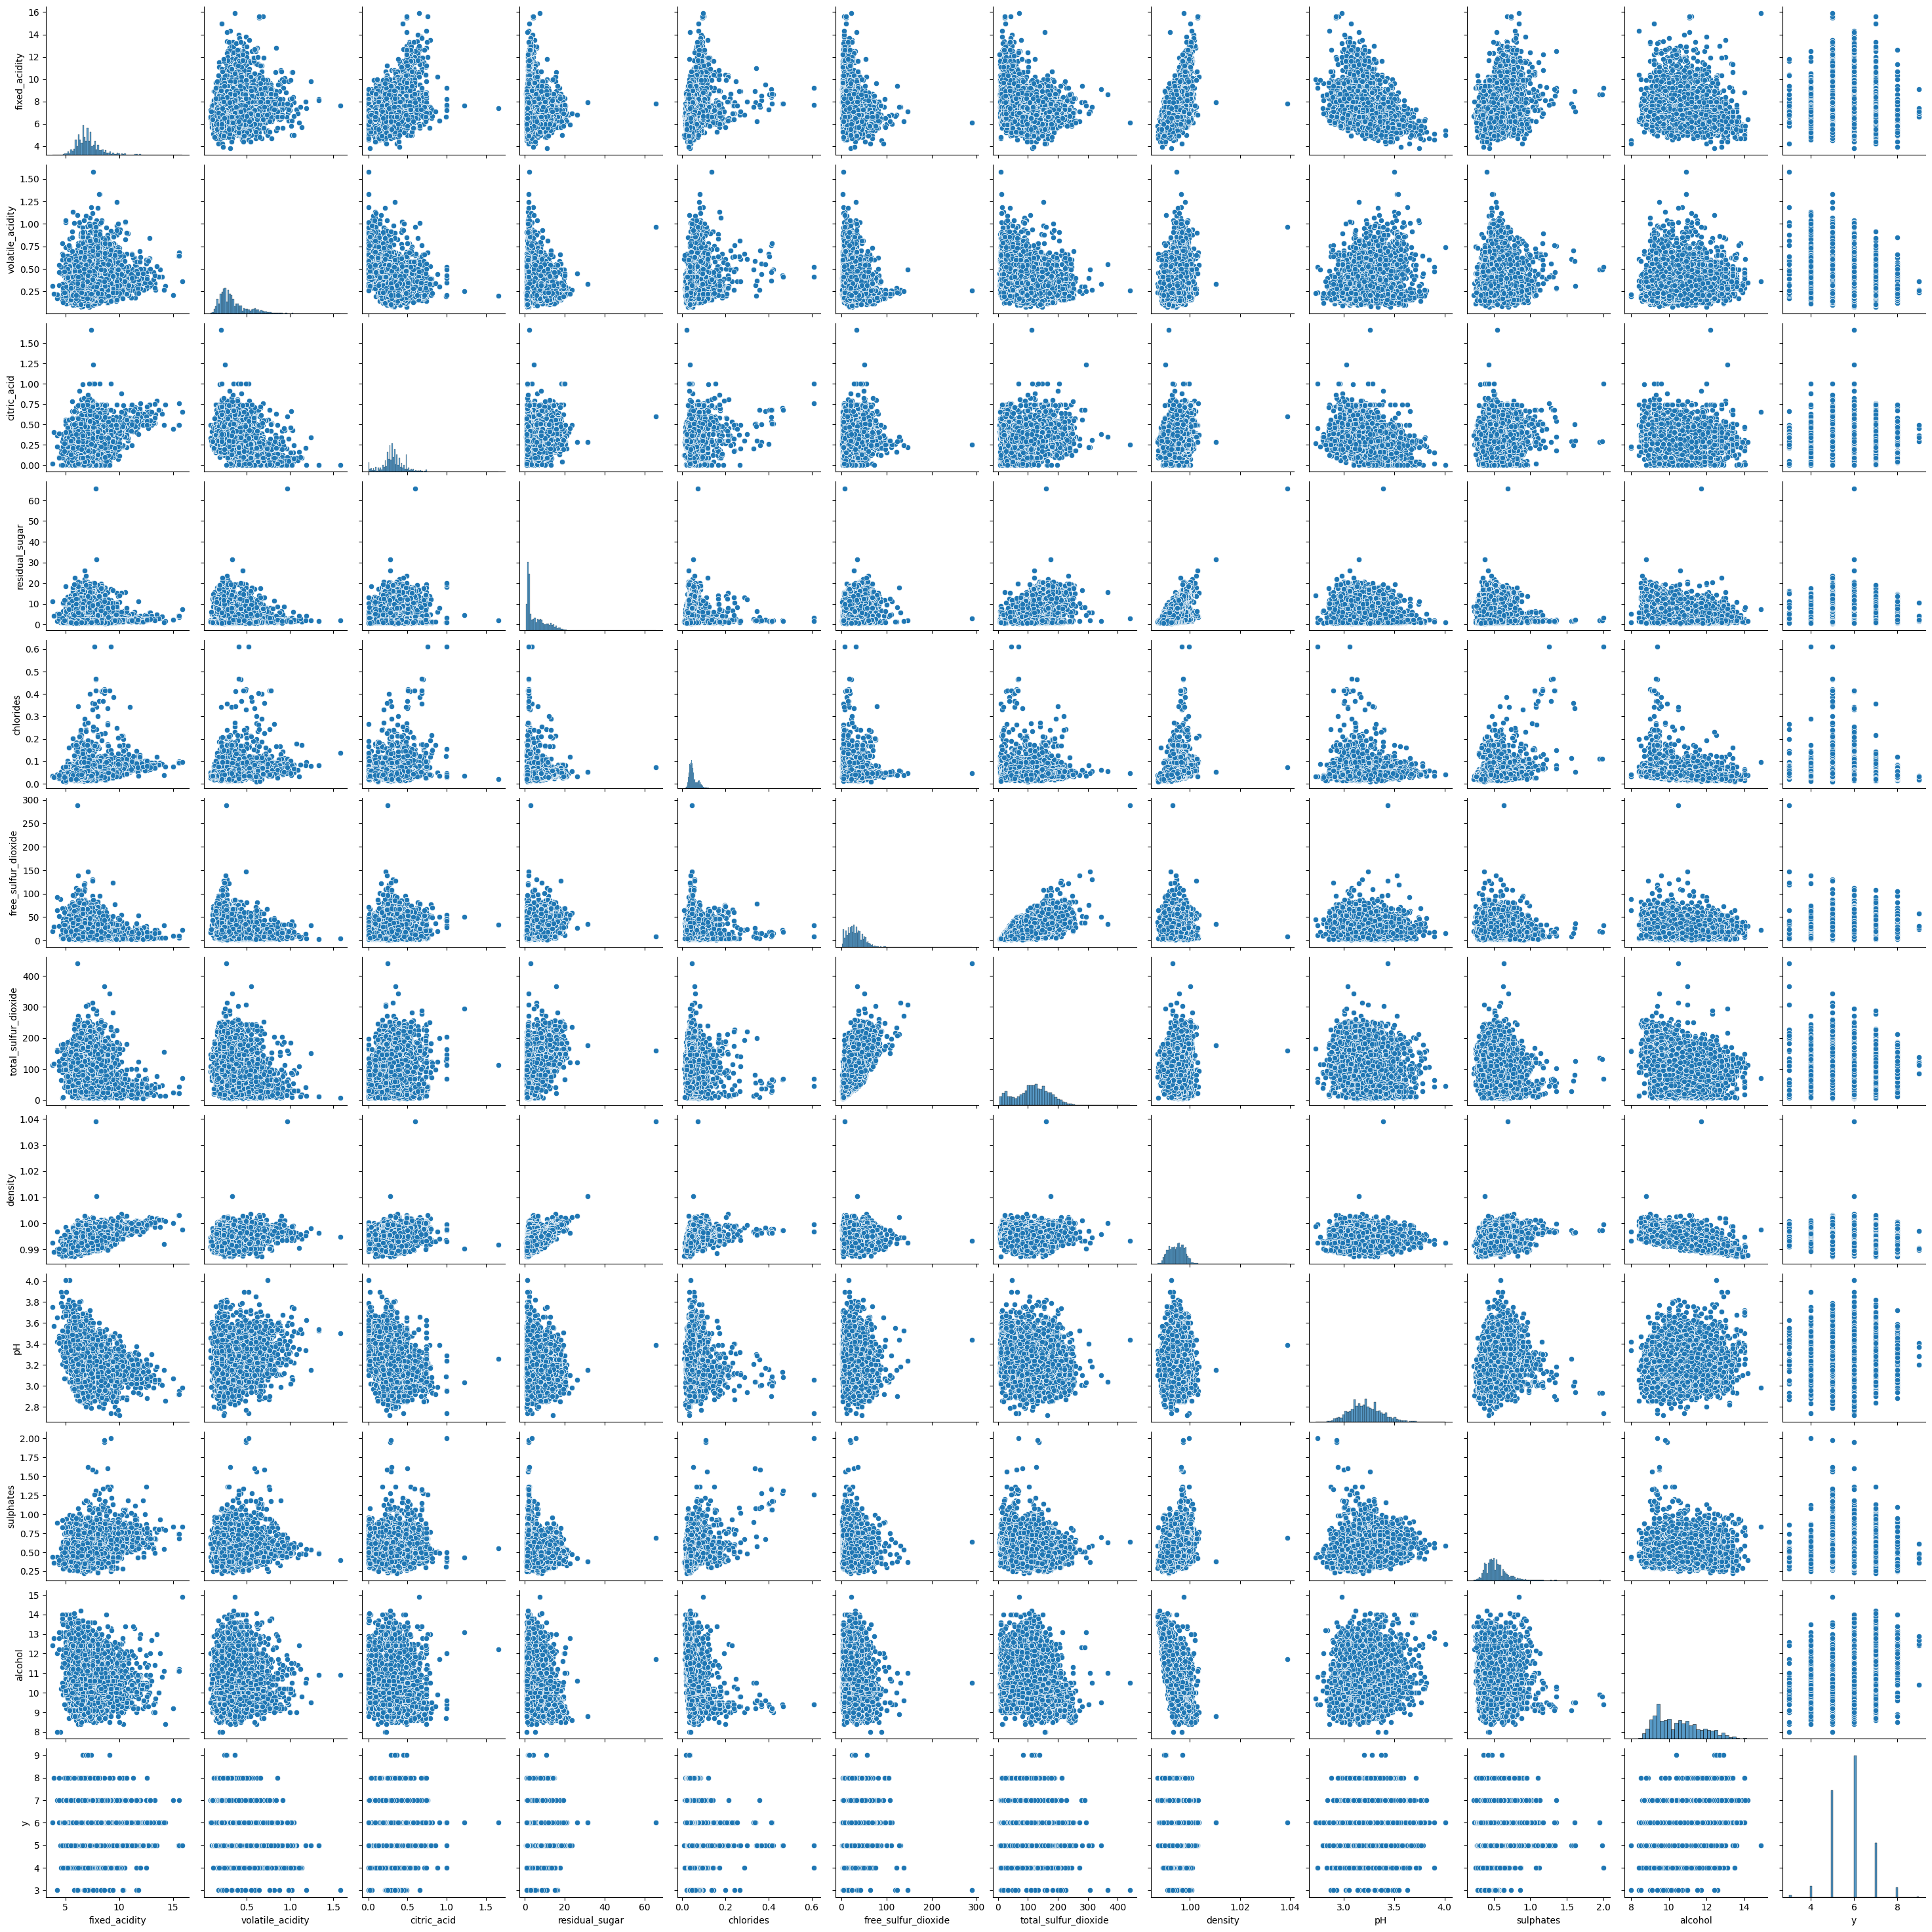

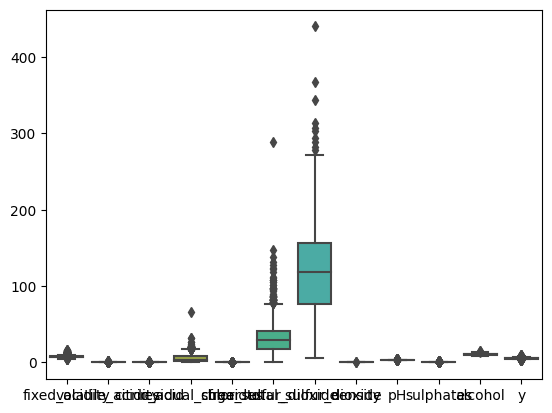

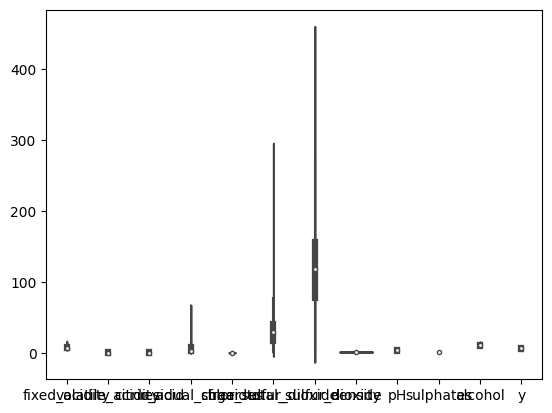

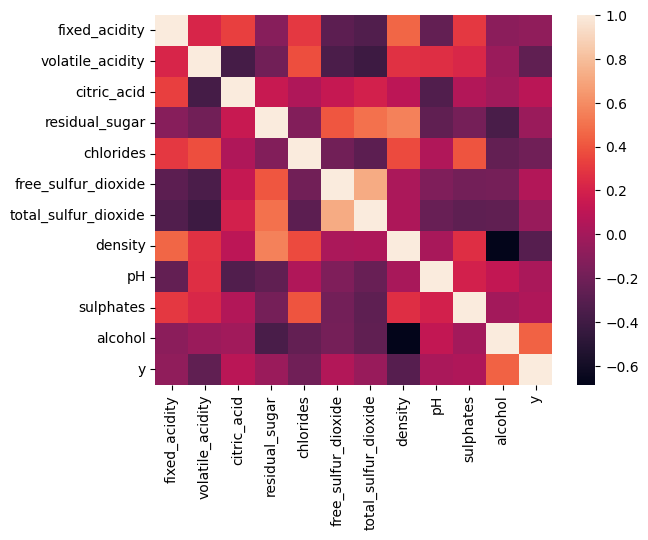

/Users/gabrielarpino/miniforge3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


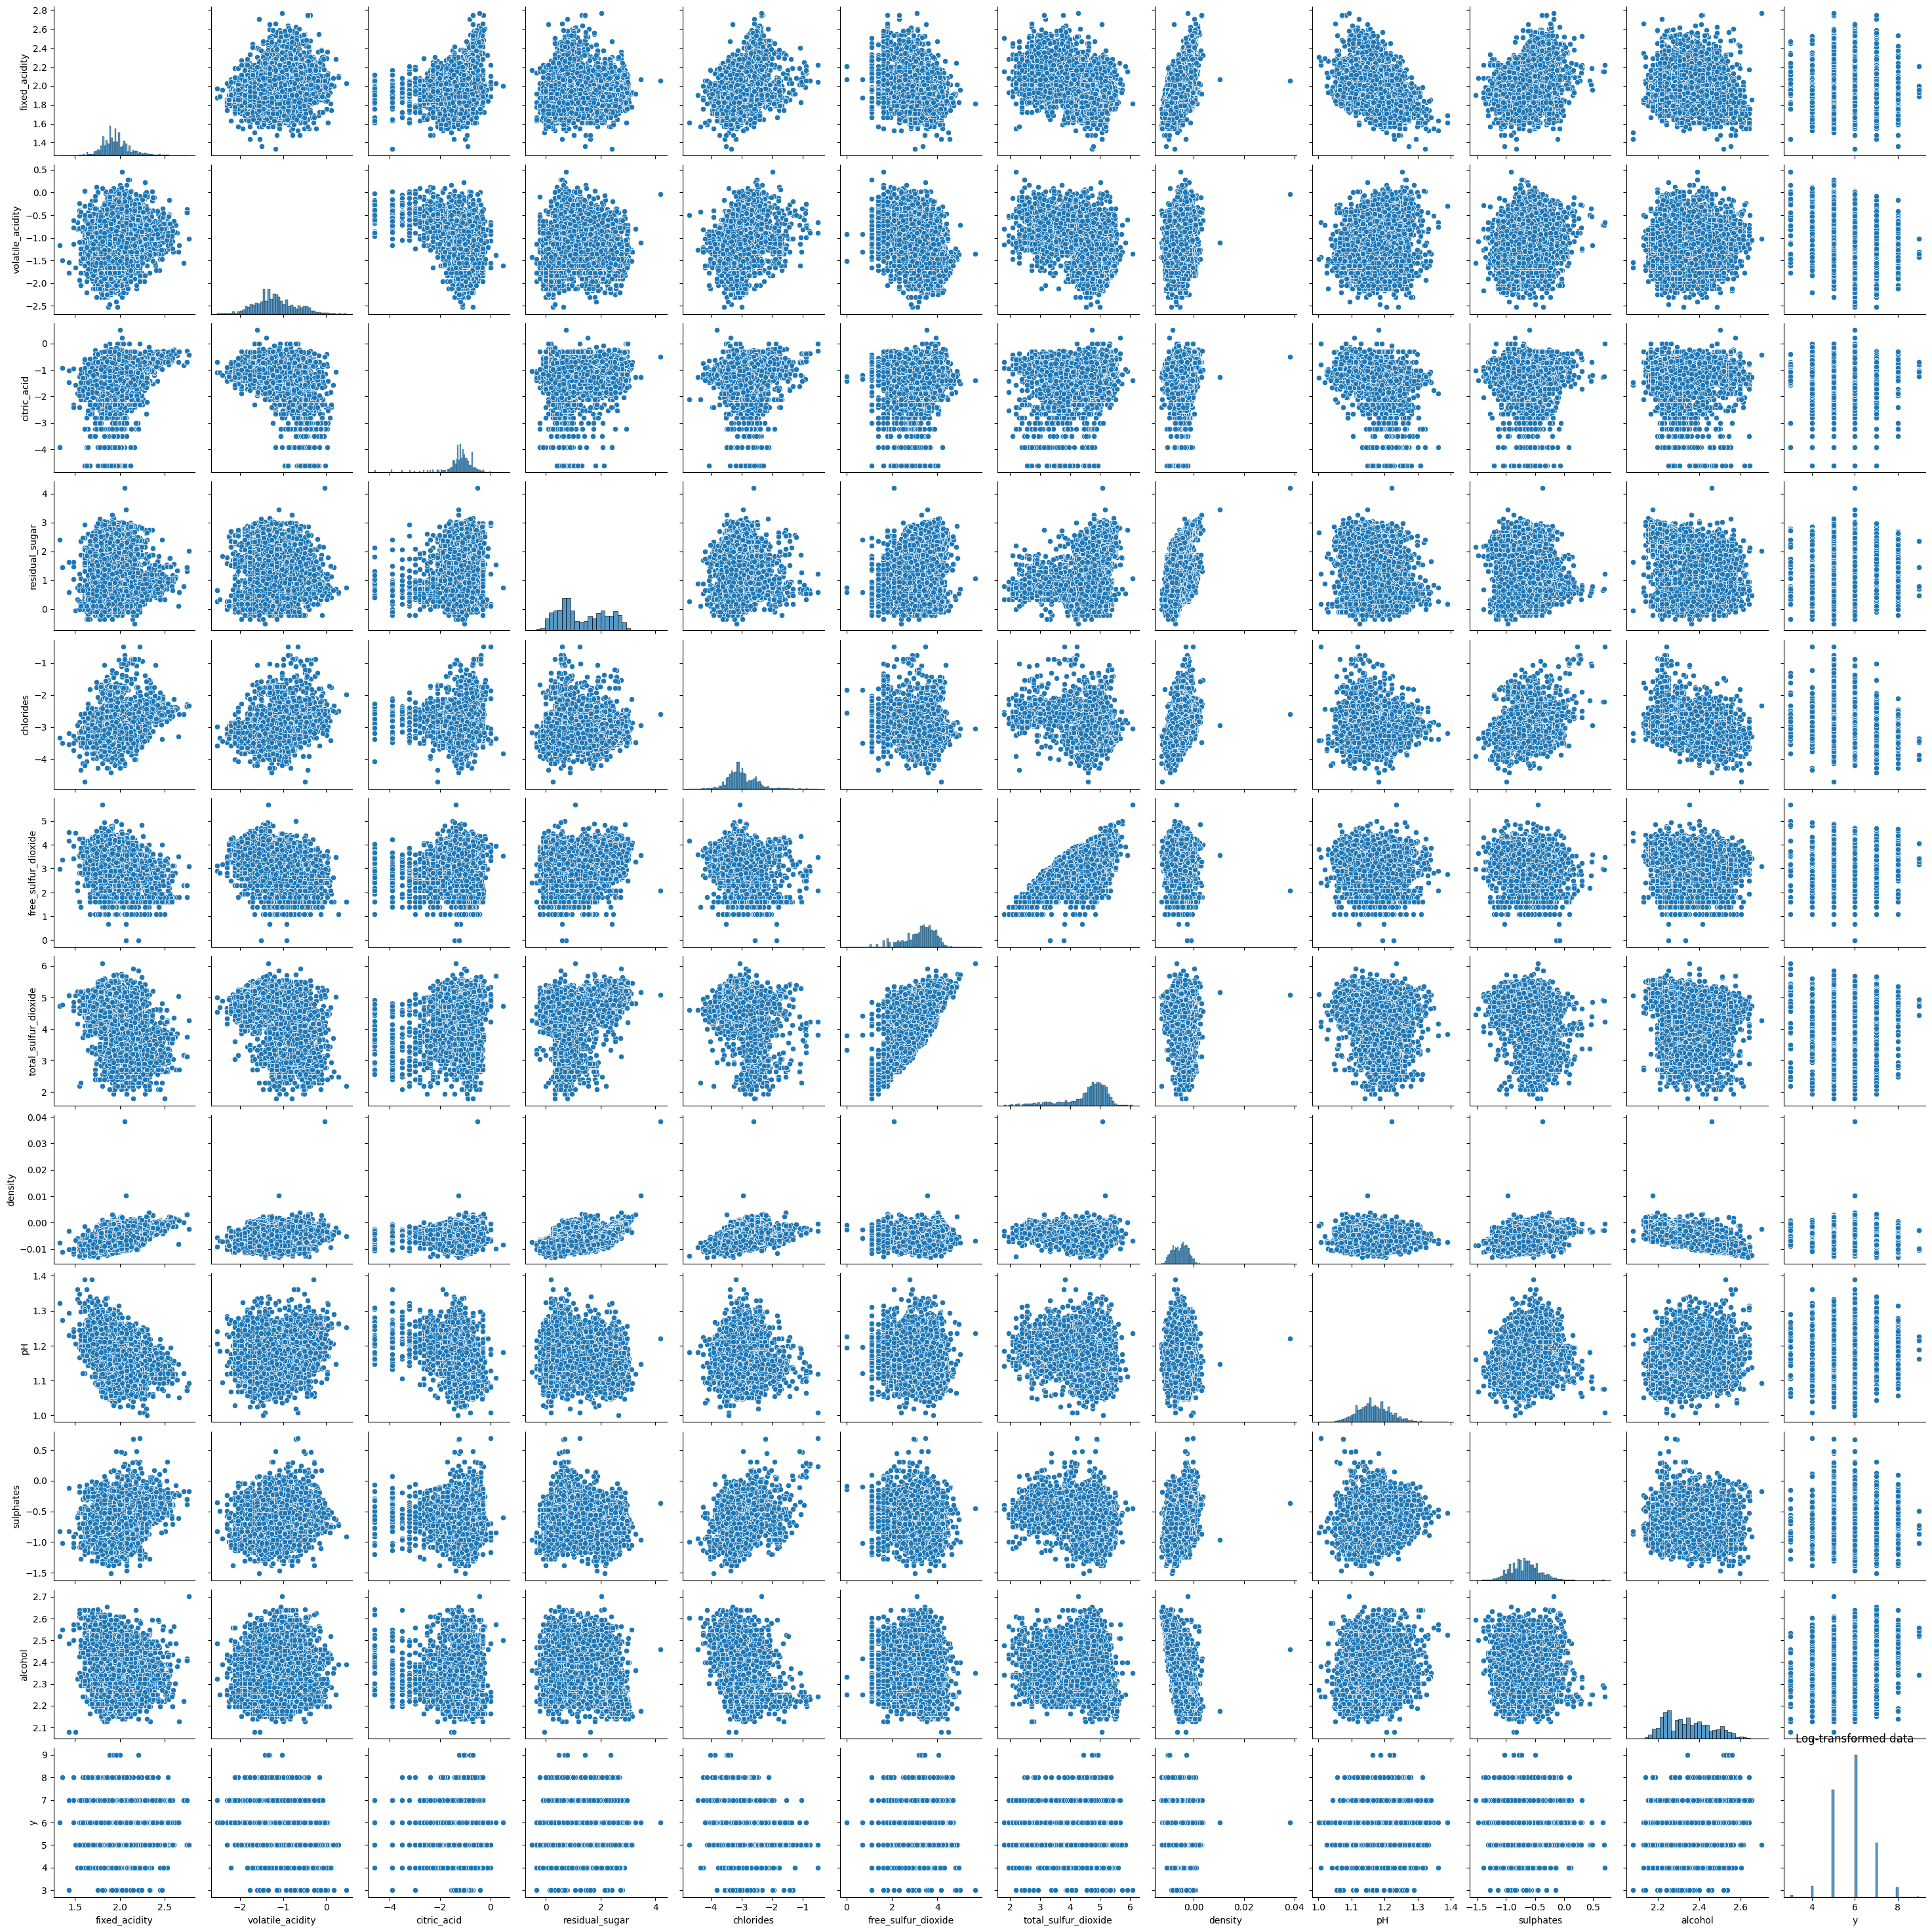

In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

n = X.shape[0]
p = X.shape[1]
δ = n/p
L = 2

# Plot a seaborn pairplot of the data
import seaborn as sns
import pandas as pd
df = pd.DataFrame(X)
df['y'] = y
sns.pairplot(df)
plt.show()

# Plot useful seaborn plots of the data
sns.boxplot(data=df)
plt.show()

sns.violinplot(data=df)
plt.show()

sns.heatmap(df.corr())
plt.show()

# Plot a seaborn pairplot of the log-transformed data
df = pd.DataFrame(np.log(X))
df['y'] = y
sns.pairplot(df)
plt.title("Log-transformed data")
plt.show()




## Transform data

In [13]:
# Whiten the data
import numpy as np
import jax.numpy as jnp
from scipy.linalg import sqrtm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

n = X.shape[0]
p = X.shape[1]
δ = n/p
print("δ: ", δ)

# X_white = X - np.mean(X, axis=1)
# X_white = jnp.array(X_white @ sqrtm(np.linalg.inv(1/n * X_white.T @ X_white)))

# print("Whitened covariance: ", 1/n * X_white.T @ X_white)

# Log-transform the residual_sugar variable and the chlorides variable
X_partial_log = X.copy()
X_partial_log['residual_sugar'] = np.log(X_partial_log['residual_sugar'])
X_partial_log['chlorides'] = np.log(X_partial_log['chlorides'])

X_partial_log_white = np.array(X_partial_log).reshape((n, p)) - np.mean(np.array(X_partial_log), axis=1).reshape((n, 1))
X_partial_log_white = jnp.array(X_partial_log_white @ sqrtm(np.linalg.pinv(1/n * X_partial_log_white.T @ X_partial_log_white + 1e-5 * np.eye(p))))

# # Plot a seaborn pairplot of the log-transformed data
# df = pd.DataFrame(X_partial_log_white)
# df['y'] = y
# sns.pairplot(df)
# plt.title("Log-transformed data")
# plt.show()

# Map the covariates to a gaussian distribution using scikit-learn's PowerTransformer
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer()
# X_gaussian = pt.fit_transform(X_partial_log)

# # Plot a seaborn pairplot of the gaussian-transformed data
# df = pd.DataFrame(X_gaussian)
# df['y'] = y
# sns.pairplot(df.sample(1000))
# plt.title("Gaussian-transformed data")
# plt.show()

# Print the covariance matrix of the gaussian-transformed data
# print("Covariance matrix of the gaussian-transformed data: ", 1/n * X_gaussian.T @ X_gaussian)
# Whiten the data using this covariance matrix
# X_gaussian_white = X_gaussian - np.mean(X_gaussian, axis=0)
# X_gaussian_white = jnp.array(X_gaussian_white @ sqrtm(np.linalg.inv(1/n * X_gaussian.T @ X_gaussian)))
# print("Covariance matrix of the gaussian-transformed data whitened: ", 1/n * X_gaussian_white.T @ X_gaussian_white)

# Set the final data to be used in the analysis
X_prep = X_partial_log_white
X_prep = X_prep * jnp.sqrt(1/n)
y_prep = jnp.array(y > 5).astype(int)

print("Whitened (unit) covariance: ", X_prep.T @ X_prep)


Whitened (unit) covariance:  [[ 0.90908575 -0.09090947 -0.09089696 -0.09090787 -0.09091026 -0.09090914
  -0.09090912 -0.09093437 -0.09089437 -0.09090595 -0.09090834]
 [-0.09090947  0.9084901  -0.091121   -0.09090473 -0.09080859 -0.09090979
  -0.09090938 -0.09019035 -0.09094968 -0.0908803  -0.09090681]
 [-0.09089696 -0.091121    0.9084249  -0.0909109  -0.09085876 -0.09090925
  -0.09090886 -0.08995527 -0.09113851 -0.09082314 -0.09090236]
 [-0.09090787 -0.09090473 -0.0909109   0.90907204 -0.09091289 -0.09090898
  -0.09090899 -0.09087648 -0.09091344 -0.09091622 -0.09091157]
 [-0.09091026 -0.09080859 -0.09085876 -0.09091289  0.90899205 -0.09090894
  -0.09090933 -0.09098602 -0.0909359  -0.09083458 -0.09092691]
 [-0.09090914 -0.09090979 -0.09090925 -0.09090898 -0.09090894  0.9090909
  -0.09090909 -0.0909088  -0.0909089  -0.09090893 -0.09090906]
 [-0.09090912 -0.09090938 -0.09090886 -0.09090899 -0.09090933 -0.09090909
   0.9090909  -0.09090877 -0.09090896 -0.09090926 -0.09090915]
 [-0.09093437

In [6]:
# Check for infs and nans in X_partial_log
print("Number of infs in X_partial_log: ", jnp.sum(jnp.isinf(np.array(X_partial_log))))
print("Number of nans in X_partial_log: ", jnp.sum(jnp.isnan(np.array(X_partial_log))))


Number of infs in X_partial_log:  0
Number of nans in X_partial_log:  0


# Run AMP

In [14]:
import numpy as np
import jax.numpy as jnp # Not used in any randomness, all randomness is in numpy
import numpy.random as nprandom
import matplotlib.pyplot as plt
from amp import norm_sq_corr, PAL
from amp.marginal_separable_jax_logistic import q, GAMP_full, GAMP_gaussian_clean
import amp.signal_configuration
from amp.signal_configuration import unif_prior_to_η_ϕ, unif_prior_to_η_ϕ_combinations
from amp.signal_priors import SignalPrior, SparseDiffSignal, SparseGaussianSignal, GaussianSignal
from amp.posterior_logistic import η_to_ψ, posterior_over_η, MAP_η
from amp.signal_priors import GaussianSignal
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)


# --- Preliminaries ---

T = 10
σ = 0.1
L = 2
# Changepoint locations
Δ = lambda n: int(n/10)
Lmin = 1
Lmax = L
p_l = 1/L * np.ones(L) # puts equal weight on all number of signals, set None otherwise. Best for estimating size. 
num_valid_configs, η_arr, p_η_arr, ϕ = unif_prior_to_η_ϕ_combinations(Lmin, Lmax, Δ(n), n, p_l = p_l) # Lxn matrix
assert η_arr.shape == (num_valid_configs, Lmax-1) and \
    len(p_η_arr) == num_valid_configs
assert ϕ.shape == (Lmax, n)

# Gaussian Signal Prior
B̃_cov = 1 * np.eye(L)
B̃_cov[0, 1] = 0.0
B̃_cov[1, 0] = 0.0
signal_prior = GaussianSignal(B̃_cov)

B̃ = signal_prior.sample(p)
ρ = 1/δ * 1/p * B̃.T @ B̃
B̂_0 = signal_prior.sample(p)

# Generate the observation vector Y
# X = np.random.normal(0, np.sqrt(1/n), (n, p))
# Θ = X @ B̃
# ε = np.random.rand(n) # uniform dist
C_true = jnp.zeros(n).astype(int)
# Y = q(Θ, jnp.ones(n).astype(int), ε) 

# B̂, Θ_t, ν_arr, κ_T_arr, ν̂_arr, κ_B_arr, ν_fixed_arr, κ_T_fixed_arr, ν̂_fixed_arr, κ_B_fixed_arr = GAMP_full(B̃, δ, p, ϕ, σ, X_gaussian, y_prep, C_true, T, B̂_0, signal_prior, signal_prior, st_ζ = None, verbose = False, seed = None, tqdm_disable = False)
B̂, Θ_t, ν, ν̂  = GAMP_gaussian_clean(B̂_0, δ, p, ϕ, L, σ, X_prep, y_prep, ρ, T, prior = None, verbose=False, seed=None, tqdm_disable = False)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5197 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5199 [00:00<?, ?it/s]

Change point estimation:  []


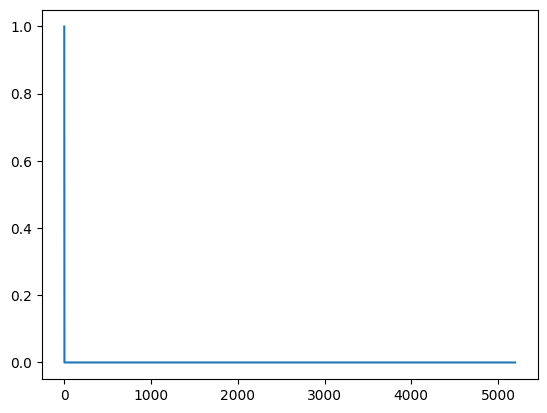

In [16]:
import amp.posterior_logistic
κ_T = ν - ν.T @ jnp.linalg.inv(ρ) @ ν
ψ_arr_amp, η_idx_amp = amp.signal_configuration.η_to_ψ_jax_combinations_mapped(η_arr, n, L)       
post_amp = amp.posterior_logistic.compute_approx_posterior(ψ_arr_amp, Θ_t, y_prep, n, ρ, σ, ν, κ_T)
map_idx_amp = np.argmax(post_amp)
ψ̂ = ψ_arr_amp[map_idx_amp]
η̂ = η_arr[η_idx_amp[map_idx_amp]]
η̂ = η̂[η̂ > 0]
print("Change point estimation: ", η̂)
plt.plot(post_amp)